
# Simulation Results

This is a summary of the simulation results, to share with the CDN lab. These results will guide our parameter selection for the modeling analysis. The modeling is the "bread and butter" of the lab so it is critical to take the time and do this correctly.


## Using choice set space

We used the choice set space defined by the experiments to determine possible values for the modeling parameters. We computed the parameter value that would allow us to model extreme values in the choice set space. That is, we should be able to model a subject whose indifference point is located on either corner of the choice set space. In Confidence Delay Decision (CDD) this translates to the most/least patient person in the sample. In Confidence Risky Decision Making (CRDM), this translates to the most/least risky person in the sample. To find the indifference point, we equate the subjective values (SV) for the two choices in the two tasks and compute the model parameters. 

<img src="./README_files/choice_set_space.png" alt="Choice Set Space" />


### Confidence Delay Decision (CDD) - discount parameters, $\kappa$

In this task we will equate the subject value (SV) for the two choices: $SV_{now}$ and $SV_{delay}$.

$$
\begin{align}
SV_{now} =& SV_{delay} \\ \\
\frac{v_{now}^{\alpha}}{1+\kappa d_{now}} =& \frac{v_{delay}^{\alpha}}{1+\kappa d_{delay}}
\end{align}
$$

The value for $d_{now}$ is set to $0$ and we set $\alpha=1$ so we can simplify and solve for $\kappa$:

$$
\begin{align}
v_{now} = \frac{v_{delay}}{1+\kappa d_{delay}} \\
\kappa = \frac{v_{delay}/v_{now} - 1}{d_{delay}}
\end{align}
$$

Using this formula, we can compute values for $\kappa$ by setting the corresponding variables and column names:
$v_{now}$ = `df['cdd_immed_amt']`, $v_{delay}$ = `df['cdd_delay_amt']`, and $d_{delay}$ = `df['cdd_delay_wait']`. We computed kappa, saved them, and display the ranges of values sorted by kappa, showing the first 5 and the last 5 of the spreadsheet.

In [19]:
import pandas as pd
fn='./estimates/kappa_values.csv'
df = pd.read_csv(fn,index_col=0)
print(df)

       kappa  cdd_immed_amt  cdd_immed_wait  cdd_delay_amt  cdd_delay_wait
30  0.002222             15               0             20             150
1   0.002667             25               0             35             150
41  0.002963             15               0             19              90
18  0.004000             15               0             24             150
58  0.005650             15               0             20              59
..       ...            ...             ...            ...             ...
42  2.166667              2               0             41               9
21  3.000000              5               0             65               4
38  3.444444              2               0             64               9
23  5.125000              2               0             43               4
84  7.875000              2               0             65               4

[93 rows x 5 columns]


This means that we can model with the following ranges for $\kappa=[0.0022,7.8750]$


### Confidence Risky Decision Making (CRDM) - risky parameter, $\alpha$

In this task we will equate the subject value (SV) for the two choices: $SV_{sure}$ and $SV_{lottery}$ with no ambiguity, i.e., $A=0$.

$$
\begin{align}
SV_{sure} =& SV_{lottery} \\ \\
p_{safe}v_{sure}^{\alpha} =& p_{lottery}v_{lottery}^{\alpha}
\end{align}
$$

The value for $p_{safe}$ is set to $1$ so we can simplify, and solve for $\alpha$:

$$
\begin{align}
v_{sure}^{\alpha} = p_{lottery}v_{lottery}^{\alpha} \\
\left(\frac{v_{sure}}{v_{lottery}}\right)^{\alpha} = p_{lottery} \\ 
\alpha \log{\left(\frac{v_{sure}}{v_{lottery}}\right)} = log{\left(p_{lottery}\right)} \\
\alpha  =  \frac{log{\left(p_{lottery}\right)}}{\log{\left(\frac{v_{sure}}{v_{lottery}}\right)}}
\end{align}
$$

Using this formula, we can compute values for $\alpha$ by setting the corresponding variables and column names:
$v_{sure}$ = `df['crdm_sure_amt']`, $v_{lottery}$ = `df['crdm_lott_amt']`, and $p_{lottery}$ = `df['crdm_lott_p']`. We computed $\alpha$, saved them, and display the ranges of values sorted by $\alpha$, showing the spreadsheet.

**NOTE:** We set `df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']` as the lottery value at the top and bottom.

In [20]:
fn='./estimates/alpha_values.csv'
df = pd.read_csv(fn,index_col=0)
# remove large negative alpha (from divide by zero or machine precision small)
# remove crdm_sure_p only so we can print the dataframe concisely, this column is all 100%
df_alpha = df.loc[df['alpha']>-1e6].drop(columns=['crdm_sure_p'])
print(df_alpha)

       alpha  crdm_sure_amt  crdm_lott_amt  crdm_lott_p  crdm_amb_lev
45  0.124939            5.0           50.0         75.0           0.0
14  0.124939            5.0           50.0         75.0           0.0
28  0.138346            5.0           40.0         75.0           0.0
26  0.138346            5.0           40.0         75.0           0.0
8   0.207519            5.0           20.0         75.0           0.0
32  0.207519            5.0           20.0         75.0           0.0
36  0.301030            5.0           50.0         50.0           0.0
7   0.301030            5.0           50.0         50.0           0.0
19  0.333333            5.0           40.0         50.0           0.0
50  0.333333            5.0           40.0         50.0           0.0
38  0.420216            5.0           50.0         38.0           0.0
11  0.420216            5.0           50.0         38.0           0.0
37  0.465310            5.0           40.0         38.0           0.0
33  0.465310        

This means that we can model with the following ranges for $\alpha=[0.125,4.341]$


### Confidence Risky Decision Making (CRDM) - ambiguity aversion, $\beta$

<img src="./README_files/risk_ambig_scheme.jpg" alt="Risk and Ambiguity task" />


Now we use the SV formula for taking the lottery and make a bound $[0.0,1.0]$ on probability of choice for the subject, with ambiguity, i.e., $A>0$. We set the baseline probability centered at $p=0.5$:

$$
\begin{align}
0 < p - \beta\frac{A}{2} &< 1.0 \\
0 < \frac{1}{2} - \beta\frac{A}{2} &< 1.0 \\
0 < 1 - \beta A &< 2.0 \\ 
\end{align}
$$

The left inequality places an upper bound on beta as follows:

$$
\begin{align}
0 &< 1 - \beta A \\ 
\beta A &< 1 \\
\beta &< \frac{1}{A}
\end{align}
$$

The right inequality places a lower bound on beta as follows:

$$
\begin{align}
1 - \beta A &< 2.0\\ 
-1 &< \beta A\\ 
\frac{-1}{A} &< \beta \\ 
\end{align}
$$

Using this formula, we can compute upped and lower bounds for $\beta$ as [`df['beta_bottom']`,`df['beta_top']`] by setting the corresponding variable and column name for ambiguity:
$A$ = `df['crdm_amb_lev']`. We computed $\beta$ top and bottom, saved them, and display the values sorted by $\beta$, showing the spreadsheet.

In [21]:
fn='./estimates/beta_values.csv'
df_beta = pd.read_csv(fn,index_col=0)
# crdm_sure_amt = 5.0 and crdm_sure_p = 100.0 so we dropped them to display
df_beta = df_beta.drop(columns=['crdm_sure_amt','crdm_sure_p'])
print(df_beta)

    beta_top  beta_bottom  crdm_amb_lev  crdm_lott_amt  crdm_lott_p
0   1.351351    -1.351351          74.0           40.0         50.0
27  1.351351    -1.351351          74.0            5.0         50.0
26  1.351351    -1.351351          74.0           20.0         50.0
24  1.351351    -1.351351          74.0            8.0         50.0
20  1.351351    -1.351351          74.0            5.0         50.0
17  1.351351    -1.351351          74.0           50.0         50.0
16  1.351351    -1.351351          74.0           50.0         50.0
12  1.351351    -1.351351          74.0            8.0         50.0
30  1.351351    -1.351351          74.0           40.0         50.0
2   1.351351    -1.351351          74.0           20.0         50.0
8   1.351351    -1.351351          74.0           40.0         50.0
9   2.000000    -2.000000          50.0           20.0         50.0
28  2.000000    -2.000000          50.0           20.0         50.0
1   2.000000    -2.000000          50.0         

This means that we can model with the following ranges for $\beta=[-4.167,4.167]$


## Principled method

### Using simulated data and plotting negative log-likelihood

In this approch, we simulate data from each point in a range of values of the parameter set. After simulating the data, we run the model estimation sequence and get a set of model parameter estimates and a negative log-likelihood. We then plot the negative log-likelihood for each point along the parameter set.

We wrote `plot_LL_parameters.py` to do this exercise for each CDD and CRDM. For CDD, we used the range 

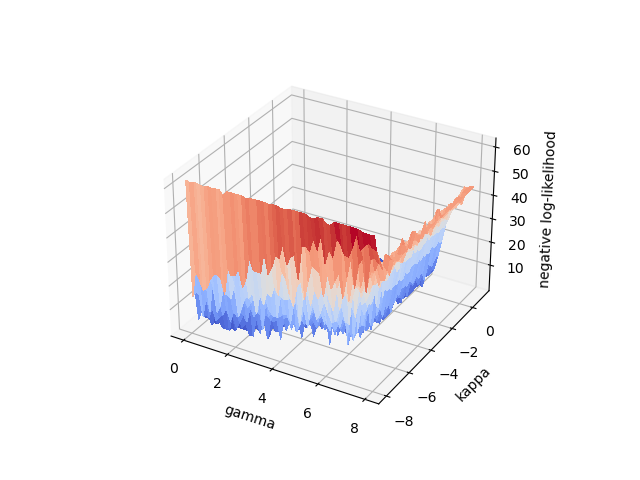

In [22]:
%matplotlib widget

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

with open('./estimates/cdd_gkLL.npy', 'rb') as f:
    X = np.load(f) # gamma
    Y = np.load(f) # kappa
    Z = np.load(f) # negative loglikelihood

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('gamma')
plt.ylabel('kappa')
ax.set_zlabel('negative log-likelihood')
plt.show()

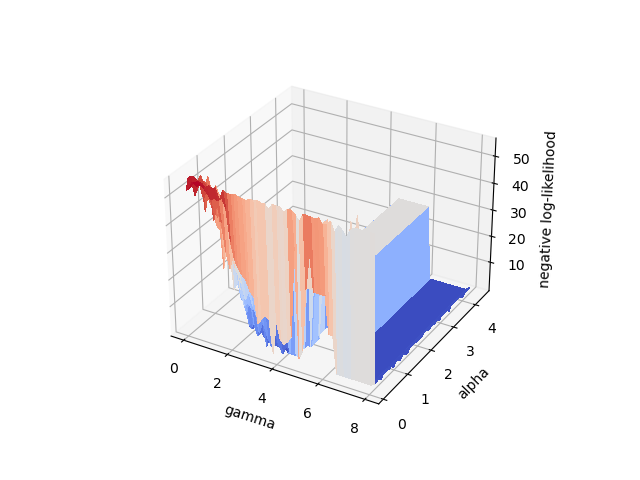

In [23]:
%matplotlib widget

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

with open('./estimates/crdm_gaLL.npy', 'rb') as f:
    X = np.load(f) # gamma
    Y = np.load(f) # alpha
    Z = np.load(f) # negative loglikelihood

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('gamma')
plt.ylabel('alpha')
ax.set_zlabel('negative log-likelihood')
plt.show()